# Project: Wrangling and Analyze Data

## Data Gathering
The dataset that we would be wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

In this section, we would be gathering data from three different sources. These gathered data would then be cleaned and analyzed to draw conclusion through visualization.


### 1.  Download the first file that was given by Udacity (twitter-archive-enhanced.csv)
For this data, we would just be reading the file that was already given to us into a dataframe. No programmatic download is necessary.

In [97]:
# importing pandas to use in reading the csv file into a dataframe
import pandas as pd

# reading the csv into a variable named df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

# checking the first 5 rows of the dataframe
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
For this data, we would be using the Python Requests library to download the tsv file from the url provided for us by Udacity, then save the tsv into a file in our pc before proceeding to reading it into a dataframe.

In [98]:
# importing the other libraries to use
import requests
import os
import json

# assigning the url to a variable called 'url' to avoid typing the full link subsequently
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# using the request library to get the url and assigning it into a varaible
r = requests.get(url)

# saving the last part of the url which is a tsv file into a file in the directory
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(r.content)

# assigning the tsv file into a dataframe and separating it by the tabs in the file    
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [99]:
# checking the ddataframe to see if it was loaded successfully
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
This data has proved to be the most tasking of the three gathering method because it involves querrying the Twitter API for information such as retweet and favorite count and then saving this information into a JSON file, line by line for each tweet ID, before proceeding to reading the JSON file line by line into a pandas dataframe.

### (NOTE): I wasn't granted access to the API so I used the alternative by downloading the file manually, however, I still included the code for querying the API because it was required, although the cell below might not run.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [100]:
# reading the JSON file line by line into a pandas Dataframe

# creating an empty list to use as the data argument when creating the DataFrame
df = []

# reading the file line by line into a dataframe
with open('tweet-json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        # creating the column names
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        # appending the values to the empty list created earlier
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
# creating a dataframe and assigning the list created earlier as the data for the dataframe and also naming the columns.        
df3 = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

In [101]:
# viewing the newly created dataframe
df3.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


## Assessing Data

Assessing data is usually the second step in the data wrangling process after all the data has been gathered in the Gathering phase. It involves taking a look at the data to see whats wrong with it in terms of quality and tidiness. 

In this section, we would be assessing the three datasets both visually and programmatically to figure out tidiness and quality issues that would require cleaning to enable us make proper analysis and visualization. Tidiness issue relates to data with structural problems likes one row having more than one observation, multiple variables in one column, some headers being values, while data with bad quality includes duplicate data, missing and corrupted data amongst many other examples.

## 1. Visual Assessment

Now, let's visually look at our three datasets and see if we would be able to locate any issues they might have.

In [102]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Some of the ratings denominator are not 10 which shouldn't be so

In [103]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Some of the dog names in the 'p1' column aren't consistent as some start with upper case while the other are all in lowercase 

- The percentage of the confidence of the algorithm prediction is a decimal and hard to understand 

In [104]:
df3

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


- The 'create_date' column has both the date and time in the same column and scattered in a messy way

## 2. Programmatic Assessment

For assessing the data programmatically, we would write a couple of codes that would enable us see parts of the data we couldn't assess visually.

In [105]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- From this table above we can see that the minimum and maximum values for the ratings numerator and denominator are wrong

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- The 'retweeted_status_id' column shows that there are 180 non-null rows, while the specification states that we only want original ratings with no retweets 

- The 'timestamp' column data type is an object instead of a date data type 

- The 'tweet_id' column is an integer instead of a string 

In [107]:
df1.name.value_counts().sort_values(ascending=False)

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Pip             1
Scruffers       1
Cheryl          1
Alejandro       1
Christoper      1
Name: name, Length: 957, dtype: int64

- Some dog names are incorrect, for example 'a' 

In [108]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- The 'img_num' column has 4 as it's maximum value while only 3 predictions were given in the data

- There are wrong minimum and maximum values in the 'p2_conf' and 'p3_conf' columns as prediction % can't go beyond 100 

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [110]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


- The 'create_date' column data type is an object instead of a datetime data type 

After assessing the three datasets both visually and with code, we would now try to list out all the quality and tidiness issues we noticed during assessment before attempting to clean them.

### Quality issues
1. The rating numerator column was extracted and populated wrongly, as some ratings with decimals were not extracted correctly

2. The 'retweeted_status_id' column shows that there are 180 non-null rows, while the specification states that we only want original ratings with no retweets

3. The timestamp column and the create_date column are the same. To avoid repititon we are going to drop the create_date column in the thrid dataframe.

4.  Drop unwanted columns that aren't necessary for analysis.

5. The 'tweet_id' column is an integer instead of a string.

6. The 'timestamp' column data type is an object instead of a datetime data type

7. The favourite and retweet count shouldn't be a float

8. The 'img_num' column has 4 as it's maximum value while only 3 predictions were given in the data

9. Some of the dog names in the 'p1', 'p2' and 'p3' columns aren't consistent as some start with upper case while the other are all in lowercase.

10. The 'source' column is overpopulated with irrelevant information, making it difficult for us to tell the source. More than one variable is contained in one column where we need only the source without the link.

### Tidiness issues
1. The 'doggo', 'floofer', 'pupper' and 'puppo' columns should all be values instead of variables. The observations are recorded as variables instead of values.

2. The three datasets should be merged into one dataset as all the three datasets are part of the same observational unit.

## Cleaning Data

Cleaning involves tackling the tidiniess and quality issues we noticed during the assessing phase and cleaning with code in order to arrive at a dataset that can be easily analysed and visualized. Firstly, we would make copies of the three dataset to clean so we do not lose the original, then we would proceed to defining the problem, cleaning it, and then testing with code to see if it was successful.

In [112]:
# Make copies of original pieces of data
df1_copy = df1.copy()

In [113]:
df2_copy = df2.copy()

In [114]:
df3_copy = df3.copy()

### Issue #1: The rating numerator column was extracted and populated wrongly, as some ratings with decimals were not extracted correctly

#### Define:
While extracting the rating numerator from the text column, some ratings that were decimals were not extracted correctly. We would therefore firstly change the data type of the rating nominator column from int to float before proceeding to extract the correct values using regular expression.

#### Code

In [115]:
# converting the rating_numerator data type from int to float to accomodate decimals for the dog rating numerator.
df1_copy.rating_numerator = df1_copy.rating_numerator.astype(float)

In [116]:
# extracting the correct rating using regex
df1_copy.rating_numerator = df1_copy.text.str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

#### Test

In [117]:
df1_copy.rating_numerator.value_counts()

12       558
11       464
10       461
13       351
9        158
8        102
7         54
14        54
5         35
6         32
3         19
4         17
2          9
1          9
9.75       2
0          2
15         2
420        2
99         1
144        1
13.5       1
11.26      1
9.5        1
20         1
121        1
143        1
44         1
60         1
45         1
80         1
204        1
50         1
007        1
1776       1
165        1
17         1
11.27      1
666        1
182        1
24         1
960        1
84         1
88         1
Name: rating_numerator, dtype: int64

### Issue #2: The 'retweeted_status_id' column shows that there are 180 non-null rows, while the specification states that we only want original ratings with no retweets nor replies.

#### Define
We would be eliminating the rows that have values in both the 'retweeted_status_id' and 'in_reply_to_status_id' because we want the dataset to only contain original tweets that arent retweets or replies.

#### Code

In [118]:
pd.isnull(df1_copy.retweeted_status_id).value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [119]:
pd.isnull(df1_copy.in_reply_to_status_id).value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [120]:
df1_copy = df1_copy[pd.isnull(df1_copy.retweeted_status_id)]

In [121]:
df1_copy = df1_copy[pd.isnull(df1_copy.in_reply_to_status_id)]

#### Test

In [122]:
df1_copy.retweeted_status_id.isnull().value_counts()

True    2097
Name: retweeted_status_id, dtype: int64

In [123]:
df1_copy.in_reply_to_status_id.isnull().value_counts()

True    2097
Name: in_reply_to_status_id, dtype: int64

### Issue #3: The 'doggo', 'floofer', 'pupper' and 'puppo' columns should all be values instead of variables.


#### Define
The four columns mentioned above should be values instead of variables. We would be unpivoting the dataframe from wide to long in order to make more sense of the data and have an observation in each row instead of a column header.

#### Code

In [124]:
# using a function to apply values to a new column we are about to create

def i(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'not_known'
    else:
        val ='None'
    return val
# creating the new column and calling the function to apply
df1_copy['not_known'] = df1_copy.apply(i, axis=1)

In [125]:
# melting the four columns that should be values into a new column and making them values

df1_copy = pd.melt(df1_copy, id_vars =['tweet_id','in_reply_to_status_id',
                       'in_reply_to_user_id','timestamp','source','text','retweeted_status_id',
                       'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
                        'rating_numerator','rating_denominator', 'name'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'not_known'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

In [126]:
# removing the duplicated rows

df1_copy = df1_copy[df1_copy['value']!= 'None']

In [127]:
# dropping the unwanted last column

df1_copy = df1_copy.drop('value', axis=1)

#### Test

In [128]:
df1_copy.dog_stage.value_counts()

not_known    1761
pupper        230
doggo          83
puppo          24
floofer        10
Name: dog_stage, dtype: int64

### Issue #4: The timestamp column and the create_date column are the same. To avoid repititon we are going to drop the create_date column in the thrid dataframe.

#### Define
We are going to be dropping the 'create_date column in the 'df3' dataframe since we already have a date column in the 'df1' dataframe. The double date columns won't be necessary as we can join the two dataframes on their tweet IDs/

#### Code

In [129]:
df3_copy = df3_copy.drop('create_date', axis=1)

#### Test

In [130]:
df3_copy.sample()

,tweet_id,retweet_count,favorite_count
1243,711732680602345472,4653,9756


### Issue #5. The 'source' column is overpopulated with irrelevant information, making it difficult for us to tell the source.

#### Define

The 'source' column contains information regarding the source of the tweet, it is hidden behind an html link which makes it difficult for us to see the source. We would be extracting the source from the string. We can either use Regular Expression or Beautiful Soup, but I prefer to use Beautiful soup as it is the best library for dealing with HTML files.

#### Code

In [131]:
# importing BeautifulSoup
from bs4 import BeautifulSoup as bs

In [132]:
# create an empty list to append the iterated and corrected source name

clean_source = []

#use a for loop to iterate through each line in the source column
for line, row in df1_copy.iterrows():
    soup = bs(row.source)
    # assign it to a variable
    i = soup.find('a').contents[0]
    #append it with the empty list we created earlier
    clean_source.append(i)
# add to the dataframe    
df1_copy.source = clean_source

#### Test

In [133]:
df1_copy.source.value_counts()

Twitter for iPhone     1974
Vine - Make a Scene      92
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: The 'tweet_id' column is an integer instead of a string.

#### Define

The 'tweet_id' column should be a string instead of an integer as we would not be using it to make any aggregations or calculations and also because we might need it to join with another table. We are going to use the astype function to make the conversion.

#### Code

In [134]:
df1_copy.tweet_id = df1_copy.tweet_id.astype(str)

In [135]:
df2_copy.tweet_id = df2_copy.tweet_id.astype(str)

In [136]:
df3_copy.tweet_id = df3_copy.tweet_id.astype(str)

#### Test

In [137]:
print(df1_copy.info())
print(df2_copy.info())
df3_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2108 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2108 non-null   object 
 4   source                      2108 non-null   object 
 5   text                        2108 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2105 non-null   object 
 10  rating_numerator            2108 non-null   object 
 11  rating_denominator          2108 non-null   int64  
 12  name                        2108 non-null   object 
 13  dog_stage                   2108

### Issue #7: The 'timestamp' column in the 'df1' dataframe has object as it's data type instead of 'datetime'.

#### Define

The date column should always have a datetime datatype instead of being a string, we are going to be using the pandas to_datetime function to convert the data type.

#### Code

In [138]:
df1_copy.timestamp = pd.to_datetime(df1_copy.timestamp)

#### Test

In [139]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2108 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2108 non-null   datetime64[ns, UTC]
 4   source                      2108 non-null   object             
 5   text                        2108 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2105 non-null   object             
 10  rating_numerator            2108 non-null   object         

### Issue #8: The favourite and retweet count shouldn't be a float

#### Define
It is impossible for the number of retweets or likes to be a decimal, therefore it is incorrect for the retweet and favourite count columns to have a float data type. We would be converting them to integers.

#### Code

In [140]:
df3_copy.retweet_count = df3_copy.retweet_count.astype(int)

In [141]:
df3_copy.favorite_count = df3_copy.favorite_count.astype(int)

#### Test

In [142]:
df3_copy

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Issue #9: The 'img_num' column has 4 as it's maximum value while only 3 predictions were given in the data.

#### Define
Only 3 predictions were made for the dog names, but the 'img_num' column has some values as 4. This is incorrect and needs to be dropped.

#### Code

In [143]:
df2_copy.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [144]:
df2_copy = df2_copy[df2_copy.img_num !=4]

#### Test

In [145]:
df2_copy.img_num.value_counts()

1    1780
2     198
3      66
Name: img_num, dtype: int64

### Issue #10: Some of the dog names in the 'p1', 'p2' and 'p3' columns aren't consistent as some start with upper case while the other are all in lowercase.

#### Define
To ensure consistency, the prediction of dog names need to all be in lower case letters. We are thereore going to convert all the names to lowercase using the 'lower' function.

#### Code

In [146]:
df2_copy.p1 = df2_copy.p1.str.lower()

In [147]:
df2_copy.p2 = df2_copy.p2.str.lower()

In [148]:
df2_copy.p3 = df2_copy.p3.str.lower()

#### Test

In [149]:
print(df2_copy.p1.value_counts())
print(df2_copy.p2.value_counts())
df2_copy.p3.value_counts()

golden_retriever      147
labrador_retriever     99
pembroke               86
chihuahua              80
pug                    57
                     ... 
guenon                  1
japanese_spaniel        1
water_buffalo           1
maze                    1
orange                  1
Name: p1, Length: 377, dtype: int64
labrador_retriever    102
golden_retriever       90
cardigan               71
chihuahua              44
french_bulldog         41
                     ... 
crib                    1
snowmobile              1
streetcar               1
bannister               1
bagel                   1
Name: p2, Length: 399, dtype: int64


labrador_retriever    78
chihuahua             57
golden_retriever      48
eskimo_dog            37
kelpie                35
                      ..
hand-held_computer     1
whiptail               1
rock_crab              1
hare                   1
banana                 1
Name: p3, Length: 405, dtype: int64

### Issue #11: Drop unwanted columns that aren't necessary for analysis.

#### Define
A couple of columns in the three dataset aren't necessary for analysis so we would be dropping them using the pandas drop function.

#### Code

In [150]:
# we would be dropping the 2nd, 3rd, 7th, 8th, 9th and 10th columns in the first dataframe
df1_copy.drop(df1_copy.columns[[1,2,6,7,8,9]], axis=1, inplace=True)

In [151]:
df2_copy.drop('jpg_url', axis=1, inplace=True)

#### Test

In [152]:
df1_copy.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage


In [153]:
df2_copy.head(0)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #12: The three datasets should be merged into one dataset as all the three datasets are part of the same observational unit.

#### Define

The rule of tidy data states that each variable forms a columns, each observation a row, and each type of observational unit forms a table. Therefore, we would be merging the three dataframes into one since the three datasets are part of the same observational unit.

#### Code

In [154]:
# merging the 3 dataframes into one on 'tweet_id'
twitter_archive_master = df1_copy.merge(df2_copy, on='tweet_id').merge(df3_copy, on='tweet_id')

#### Test

In [155]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,1,german_shepherd,0.707046,True,malinois,0.199396,True,norwegian_elkhound,0.049148,True,3128,20771


As stated earlier in the requirements for the cleaning process, the dataset is not required to be cleaned completely, just enough to enable smooth analysis and visualization. Taking into consideration the requirement to work on 8 quality issues and 2 tidiness issues, we have come to the end of the data cleaning process. 

Next, we would save these dataframes to a directory on the pc and then proceed to merging the three datafreames into one master dataframe

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [156]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

For analysis, we would be taking a look at the merged dataset and trying to find correlations between variables, we would also be plotting a visualization in order to beteer understand the dataset. As a requirement, we should arrive at 3 insights and at least 1 visualization.

Let's take a look at the master dataset one more time to try to draw analysis.

In [157]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [158]:
twitter_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12.0,10,Yogi,doggo,1,german_shepherd,0.707046,True,malinois,0.199396,True,norwegian_elkhound,0.049148,True,3128,20771
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12.0,10,None,doggo,2,labrador_retriever,0.476913,True,chesapeake_bay_retriever,0.174145,True,german_short-haired_pointer,0.092861,True,5669,28031
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12.0,10,Napolean,doggo,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628,20730
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12.0,10,Scout,doggo,1,chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327,16476


In [173]:
twitter_master.rating_numerator.value_counts().sort_index(ascending=False)

1776.00      1
420.00       1
204.00       1
165.00       1
144.00       1
121.00       1
99.00        1
88.00        1
84.00        1
80.00        1
60.00        1
50.00        1
45.00        1
44.00        1
24.00        1
14.00       29
13.50        1
13.00      240
12.00      440
11.27        1
11.26        1
11.00      387
10.00      415
9.75         1
9.00       150
8.00        95
7.00        52
6.00        32
5.00        32
4.00        16
3.00        19
2.00         9
1.00         5
0.00         1
Name: rating_numerator, dtype: int64

### Insight 1:

- From the above analysis, it can be observed that the most frequent rating given to the dogs was 12, with 440 tweets containing that value as the numerator. This was followed closely by 10 and 11 with 415, and 387 occcurences respectively.  

In [160]:
twitter_master.name.value_counts().sort_values(ascending=False).head(10)

None       524
a           54
Cooper      10
Charlie     10
Lucy        10
Oliver       9
Penny        9
Tucker       9
Winston      8
Sadie        8
Name: name, dtype: int64

### Insight 2:

- From the figure above, we can see that LUCY, CHARLIE, and COOPER are the top names given to dogs with each occuring 10 times in the entire dataset. Then followed closely by OLIVER, TUCKER, and PENNY with 9 occurences each.

In [161]:
twitter_master.groupby('dog_stage').favorite_count.max()

dog_stage
doggo        131075
floofer       33345
not_known    107956
pupper       106827
puppo        132810
Name: favorite_count, dtype: int64

In [162]:
twitter_master.groupby('dog_stage').favorite_count.min()

dog_stage
doggo        2593
floofer      2262
not_known      81
pupper        693
puppo        3277
Name: favorite_count, dtype: int64

### Insight 3:


- From the above, we can tell that PUPPO produced the most likes with 132,810 being the highest favourite count for any dog, followed closely by DOGGO with 131,075 likes. PUPPER has the lowest favorite count with just 693 likes.

### Visualization

For our visualization, we are going to plot a graph with two variables to check the correlation between 'source' and count of tweet represented by 'tweet_id'

We would like to know which source produced the most tweets and by what margin. We would be pivotting the data to make a plot, but before we do that, we would have to do some further cleaning by dropping the duplicate values in the 'tweet_id' column as it would prevent us from being able to pivot the dataset.

In [163]:
twitter_master.drop_duplicates('tweet_id', inplace=True)

In [164]:
twitter_master.tweet_id.duplicated().value_counts()

False    1941
Name: tweet_id, dtype: int64

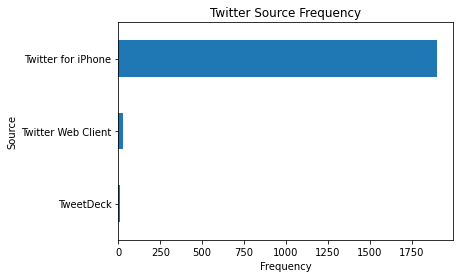

In [166]:
plot = twitter_master.groupby('source').count().tweet_id.plot(kind='barh')
plot.set_title("Twitter Source Frequency")
plot.set_xlabel("Frequency")
plot.set_ylabel("Source");

From the visualization above, we can see that 'Twitter For Iphone' was the major source of all the tweets that we populated and analysed, while TweetDeck has the lowest number of users.